# Before you start :
   - These exercises are related to the Subsetting and Descriptive Stats lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# my own lib

import logging
logging.getLogger().setLevel(logging.DEBUG)

class Auto_EDA:
    def __init__(self, dataframe: pd.DataFrame):
        # not df.copy() because this way df can be changes outside of this class
        # STATIC context
        self.df = dataframe
        self.init_rows = self.count_rows()
        self.init_cols = self.count_cols()

        # DYNAMIC context: need to be refreshed before using
        self.numerical_columns = self.get_numerical_columns()
        self.categorical_columns = self.get_categorical_columns()
        

    def get_numerical_columns(self) -> list:
        return self.df.describe().columns.tolist()

    def get_categorical_columns(self) -> list:
        return self.df.select_dtypes(exclude="number").columns.tolist()

    def unique_values(self, columns: list = None) -> dict:
        result = dict()
        if not columns:
            # for entire dataset
            columns = self.df.columns
        
        # by default - for a subset specified by a column list
        for col in columns:
            result[col] = self.df[col].nunique()
                
        return result
    
    def count_rows(self):
        return self.df.shape[0]
    
    def count_cols(self):
        return self.df.shape[1]

    def print_eda_report(self):
        # TODO: save the report as a text file automatically.
        self.numerical_columns = self.get_numerical_columns()
        self.categorical_columns = self.get_categorical_columns()

        print(f"================= Dataframe =================")
        print(f"Dataframe has shape {self.df.shape}")
        print()

        print(f"Dataframe has numerical data in columns: {self.numerical_columns}")
        numerical_dict = self.unique_values(columns=self.numerical_columns)
        
        # sorting dictionary by values descending
        # lambda function for bonus points!
        numerical_dict = dict(sorted(numerical_dict.items(), key=lambda item: item[1], reverse=True))

        for key, value in numerical_dict.items():
            print(f'- Column "{key}" has {value} unique values.')
            if value <= 20:
                print(f"   -- Unique values are:\n {self.df[key].unique()}")

        print()

        # TODO: code duplication
        print(f"Dataframe has categorical data in columns: {self.categorical_columns}")
        categorical_dict = self.unique_values(columns=self.categorical_columns)

        for key, value in categorical_dict.items():
            print(f'- Column "{key}" has {value} unique values.')
            if value <= 20:
                print(f"  -- Unique values are:\n {self.df[key].unique()}")

        print()

    # END OF PRINT EDA


# Challenge 1

#### In this challenge we will use the `Temp_States.csv` file. 

#### First import it into a data frame called `temp`.

In [3]:
data = pd.read_csv("Temp_States.csv")
temp = data.copy()

#### Print `temp`

In [4]:
temp

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333
3,Hartford,Connecticut,17.222222
4,Bridgeport,Connecticut,14.444444
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Explore the data types of the Temp dataframe. What type of data do we have? Comment your result.

In [12]:
eda_temp = Auto_EDA(temp)

In [13]:
eda_temp.print_eda_report()

================= Dataframe =================
Dataframe has shape (7, 3)

Dataframe has numerical data in columns: ['Temperature']
- Column "Temperature" has 7 unique values.
   -- Unique values are:
 [19.44444444  9.44444444  3.33333333 17.22222222 14.44444444 22.22222222
 20.        ]

Dataframe has categorical data in columns: ['City', 'State']
- Column "City" has 7 unique values.
  -- Unique values are:
 ['NYC' 'Albany' 'Buffalo' 'Hartford' 'Bridgeport' 'Treton' 'Newark']
- Column "State" has 3 unique values.
  -- Unique values are:
 ['New York' 'Connecticut' 'New Jersey']



#### Select the rows where state is New York

In [17]:
subset_new_york = temp[temp['State'] == 'New York']
subset_new_york

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333


#### What is the average of the temperature of cities in New York?

In [20]:
print(subset_new_york['Temperature'].mean())

10.74074074074074


#### We want to know cities and states with Temperature above 15 degress Celcius

In [27]:
temp[temp['Temperature'] > 15][['City', 'State']]

,City,State
0,NYC,New York
3,Hartford,Connecticut
5,Treton,New Jersey
6,Newark,New Jersey


#### Now, return only the cities that have a temperature above 15 degress Celcius

In [28]:
temp[temp['Temperature'] > 15][['City']]

,City
0,NYC
3,Hartford
5,Treton
6,Newark


#### We want to know which cities have a temperature above 15 degrees Celcius and below 20 degrees Celcius

*Hint: First write the condition then select the rows.*

In [31]:
temp[(15 < temp['Temperature']) & (temp['Temperature']< 20)][['City']]

,City
0,NYC
3,Hartford


In [32]:
temp['State'].value_counts()

State
New York       3
Connecticut    2
New Jersey     2
Name: count, dtype: int64

#### Find the mean and the standard deviation of the temperature of each state.

*Hint: Use functions from Data Manipulation lesson*

In [34]:
temp.groupby("State")["Temperature"].mean()

State
Connecticut    15.833333
New Jersey     21.111111
New York       10.740741
Name: Temperature, dtype: float64

In [35]:
temp.groupby("State")["Temperature"].std()

State
Connecticut    1.964186
New Jersey     1.571348
New York       8.133404
Name: Temperature, dtype: float64

# Challenge 2

#### Load the `employee.csv` file into a DataFrame. Call the dataframe `employee`

In [36]:
data = pd.read_csv("employee.csv")
employee = data.copy()
employee

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### Explore the data types of the Temp dataframe. Comment your results

In [38]:
eda_employee = Auto_EDA(employee)
eda_employee.print_eda_report()

================= Dataframe =================
Dataframe has shape (9, 7)

Dataframe has numerical data in columns: ['Years', 'Salary']
- Column "Years" has 6 unique values.
   -- Unique values are:
 [1 2 4 3 8 7]
- Column "Salary" has 5 unique values.
   -- Unique values are:
 [35 30 55 70 60]

Dataframe has categorical data in columns: ['Name', 'Department', 'Education', 'Gender', 'Title']
- Column "Name" has 9 unique values.
  -- Unique values are:
 ['Jose' 'Maria' 'David' 'Sonia' 'Samuel' 'Eva' 'Carlos' 'Pedro' 'Ana']
- Column "Department" has 3 unique values.
  -- Unique values are:
 ['IT' 'HR' 'Sales']
- Column "Education" has 3 unique values.
  -- Unique values are:
 ['Bachelor' 'Master' 'Phd']
- Column "Gender" has 2 unique values.
  -- Unique values are:
 ['M' 'F']
- Column "Title" has 3 unique values.
  -- Unique values are:
 ['analyst' 'associate' 'VP']



#### Show visually the frequency distribution (histogram) of the employee dataset. In few words describe these histograms?

In [40]:
numerical_cols = eda_employee.get_numerical_columns()
df_subset = employee[numerical_cols]
df_subset

,Years,Salary
0,1,35
1,2,30
2,2,30
3,4,35
4,3,55
5,2,55
6,8,70
7,7,60
8,8,70


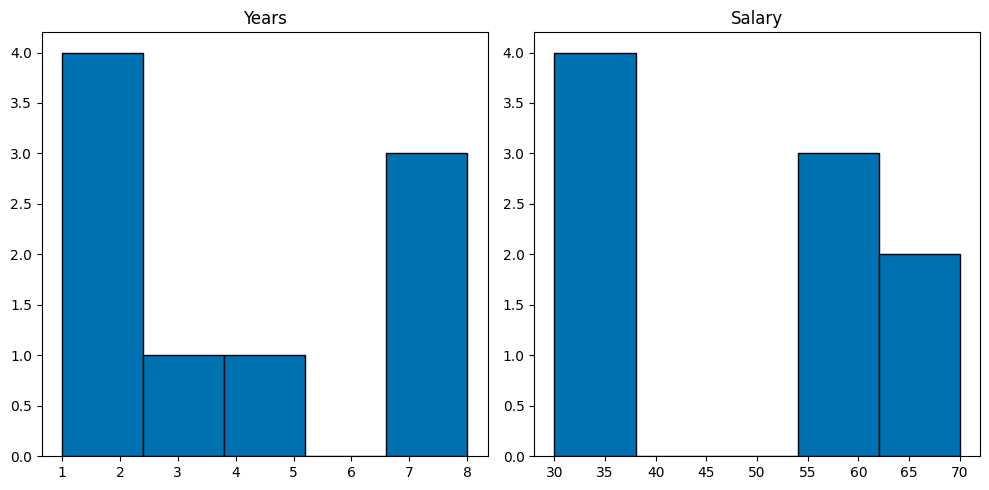

In [73]:
logging.getLogger().setLevel(logging.ERROR)

# Histograms combo by Isi
color = '#0072B2'

# grid size
nrows, ncols = 1, 2  # adjust for your number of features

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 5))

axes = axes.flatten()

# Plot each numerical feature
for i, ax in enumerate(axes):
    if i >= len(numerical_cols):
        ax.set_visible(False)  # hide unesed plots
        continue
    ax.hist(df_subset.iloc[:, i], bins=5, color=color, edgecolor='black')
    ax.set_title(numerical_cols[i])

plt.tight_layout()
plt.show()
#  Isi code end

logging.getLogger().setLevel(logging.DEBUG)

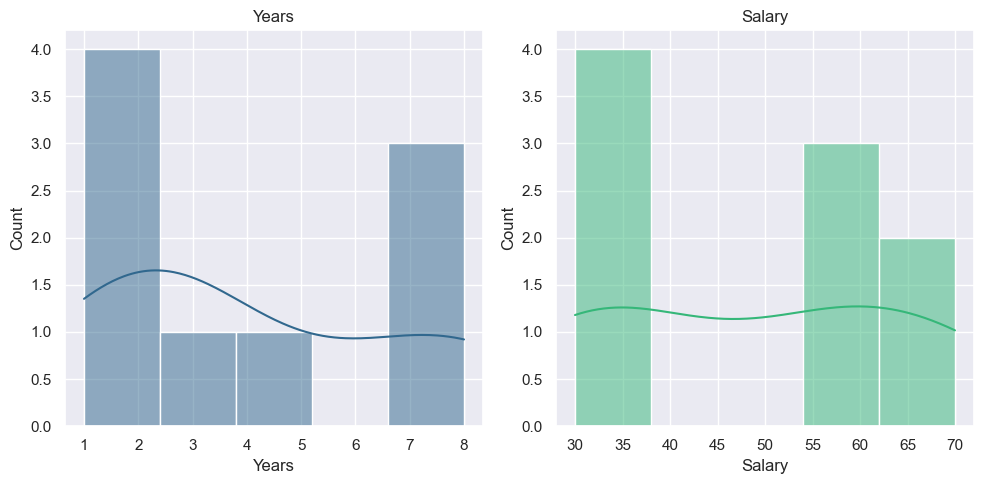

In [96]:
logging.getLogger().setLevel(logging.INFO)

# plt.figure(figsize=(10, 5))
colors = sns.color_palette("viridis", len(numerical_cols))
sns.set_theme(style="darkgrid")

nrows, ncols = 1, 2  # adjust for your number of features
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 5))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.histplot(data=employee[[col]], x=col, kde=True, bins=5, ax=axes[i], color=colors[i])
    axes[i].set_title(col)    

plt.tight_layout()
plt.show()

logging.getLogger().setLevel(logging.DEBUG)

#### What's the average salary in this company?

In [74]:
employee['Salary'].mean()

np.float64(48.888888888888886)

#### What's the highest salary?

In [75]:
employee['Salary'].max()

np.int64(70)

#### What's the lowest salary?

In [77]:
sal_min = employee['Salary'].min()
print(sal_min)

30


#### Who are the employees with the lowest salary?

In [78]:
employee[employee['Salary'] == sal_min][['Name']]

,Name
1,Maria
2,David


#### Could you give all the information about an employee called David?

In [79]:
employee[employee['Name'] == 'David']

,Name,Department,Education,Gender,Title,Years,Salary
2,David,HR,Master,M,analyst,2,30


#### Could you give only David's salary?

In [80]:
employee[employee['Name'] == 'David'][['Salary']]

,Salary
2,30


#### Print all the rows where job title is associate

In [81]:
employee[employee['Title'] == 'associate']

,Name,Department,Education,Gender,Title,Years,Salary
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
7,Pedro,IT,Phd,M,associate,7,60


#### Print the first 3 rows of your dataframe

##### Tip : There are 2 ways to do it. Do it both ways

In [82]:
employee.head(3)

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


In [83]:
employee.iloc[:3, :]

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Find the employees who's title is associate and the salary above 55?

In [85]:
employee[(employee['Title'] == 'associate') & (employee['Salary'] > 55)][['Name']]

,Name
7,Pedro


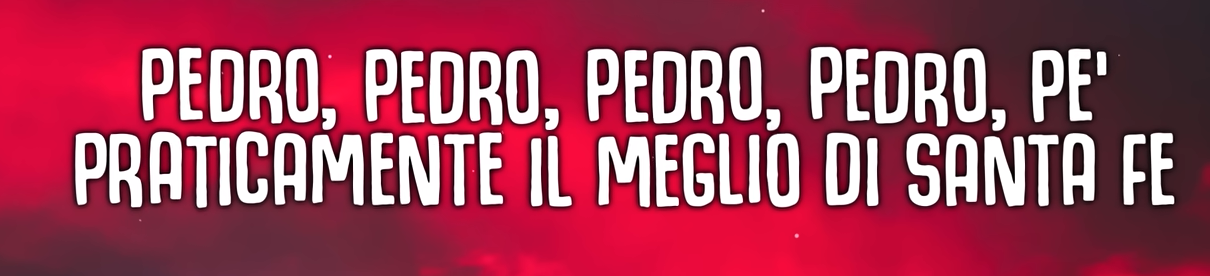

#### Group the employees based on their number of years of employment. What are the average salaries in each group?

In [87]:
employee.groupby("Years")["Salary"].mean()

Years
1    35.000000
2    38.333333
3    55.000000
4    35.000000
7    60.000000
8    70.000000
Name: Salary, dtype: float64

####  What is the average Salary per title?

In [88]:
employee.groupby("Title")["Salary"].mean()

Title
VP           70.000000
analyst      32.500000
associate    56.666667
Name: Salary, dtype: float64

#### Show a visual summary of the data using boxplot. What Are the First and Third Quartiles? Comment your results.

* Hint : Quantiles vs Quartiles*
In Probability and Statistics, quantiles are cut points dividing the range of a probability distribution into continuous intervals with equal probabilities. When division is into four parts the values of the variate corresponding to 25%, 50% and 75% of the total distribution are called quartiles.

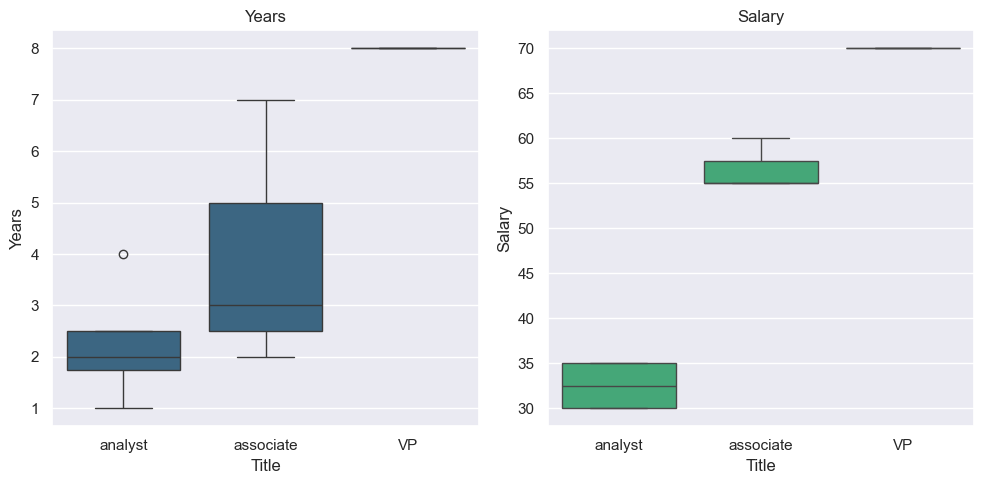

In [95]:
logging.getLogger().setLevel(logging.INFO)

# plt.figure(figsize=(10, 5))
colors = sns.color_palette("viridis", len(numerical_cols))
sns.set_theme(style="darkgrid")

nrows, ncols = 1, 2  # adjust for your number of features
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 5))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.boxplot(x=employee['Title'], y=employee[col], linewidth=1, ax=axes[i], color=colors[i])
    axes[i].set_title(col)    

plt.tight_layout()
plt.show()

logging.getLogger().setLevel(logging.DEBUG)

In [97]:
q1 = employee["Salary"].quantile(0.25)  # First quartile (25th percentile)
print(f"Q1 (25th percentile): {q1}")

Q1 (25th percentile): 35.0


In [98]:
q3 = employee["Salary"].quantile(0.75)  # Third quartile (75th percentile)
print(f"Q3 (75th percentile): {q3}")# print third quartile here

Q3 (75th percentile): 60.0


#### Is the mean salary per gender different?

In [100]:
mean_salary_per_gender = employee.groupby("Gender")["Salary"].mean().reset_index()
mean_salary_per_gender

,Gender,Salary
0,F,47.5
1,M,50.0


#### Find the minimum, mean and the maximum of all numeric columns for each Department.

##### Hint: Use functions from Data Manipulation lesson

In [105]:
subset = employee.groupby("Department")

for col in numerical_cols:
    print(col)
    print(f"Min:\n {subset[col].min()}\n")
    print(f"Mean:\n {subset[col].mean()}\n")
    print(f"Max\n: {subset[col].max()}\n")
    print()

Years
Min:
 Department
HR       2
IT       1
Sales    2
Name: Years, dtype: int64

Mean:
 Department
HR       4.666667
IT       4.500000
Sales    2.500000
Name: Years, dtype: float64

Max
: Department
HR       8
IT       8
Sales    3
Name: Years, dtype: int64


Salary
Min:
 Department
HR       30
IT       30
Sales    55
Name: Salary, dtype: int64

Mean:
 Department
HR       45.00
IT       48.75
Sales    55.00
Name: Salary, dtype: float64

Max
: Department
HR       70
IT       70
Sales    55
Name: Salary, dtype: int64




### Bonus Question

#### For each department, compute the difference between the maximal salary and the minimal salary.

##### * Hint: try using `agg` or `apply` and `lambda`*

In [107]:
# Compute the difference between the maximal and minimal salary for each department
salary_range_per_department = employee.groupby("Department")["Salary"].agg(lambda x: x.max() - x.min()).reset_index()

# Rename the column for clarity
salary_range_per_department.rename(columns={"Salary": "Salary Range"}, inplace=True)

salary_range_per_department

,Department,Salary Range
0,HR,40
1,IT,40
2,Sales,0


# Challenge 3

#### Open the Orders.csv dataset. Name your dataset orders

In [108]:
data = pd.read_csv("Orders.csv")
orders = data.copy()
orders

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
0,0,536365,85123A,2010,12,3,8,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,1,536365,71053,2010,12,3,8,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,2,536365,84406B,2010,12,3,8,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,3,536365,84029G,2010,12,3,8,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,4,536365,84029E,2010,12,3,8,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397919,541904,581587,22613,2011,12,5,12,pack of 20 spaceboy napkins,12,2011-12-09 12:50:00,0.85,12680,France,10.20
397920,541905,581587,22899,2011,12,5,12,children's apron dolly girl,6,2011-12-09 12:50:00,2.10,12680,France,12.60
397921,541906,581587,23254,2011,12,5,12,childrens cutlery dolly girl,4,2011-12-09 12:50:00,4.15,12680,France,16.60
397922,541907,581587,23255,2011,12,5,12,childrens cutlery circus parade,4,2011-12-09 12:50:00,4.15,12680,France,16.60


#### Explore your dataset by looking at the data types and the summary statistics. Comment your results

In [109]:
eda_orders = Auto_EDA(orders)
eda_orders.print_eda_report()

================= Dataframe =================
Dataframe has shape (397924, 14)

Dataframe has numerical data in columns: ['Unnamed: 0', 'InvoiceNo', 'year', 'month', 'day', 'hour', 'Quantity', 'UnitPrice', 'CustomerID', 'amount_spent']
- Column "Unnamed: 0" has 397924 unique values.
- Column "InvoiceNo" has 18536 unique values.
- Column "CustomerID" has 4339 unique values.
- Column "amount_spent" has 2838 unique values.
- Column "UnitPrice" has 441 unique values.
- Column "Quantity" has 302 unique values.
- Column "hour" has 15 unique values.
   -- Unique values are:
 [ 8  9 10 11 12 13 14 15 16 17  7 18 19 20  6]
- Column "month" has 12 unique values.
   -- Unique values are:
 [12  1  2  3  4  5  6  7  8  9 10 11]
- Column "day" has 6 unique values.
   -- Unique values are:
 [3 4 5 7 1 2]
- Column "year" has 2 unique values.
   -- Unique values are:
 [2010 2011]

Dataframe has categorical data in columns: ['StockCode', 'Description', 'InvoiceDate', 'Country']
- Column "StockCode" has 

####  What is the average Purchase Price?

In [110]:
orders[['amount_spent']].mean()

amount_spent    22.394749
dtype: float64

#### What were the highest and lowest purchase prices? 

In [112]:
orders[['amount_spent']].max()

amount_spent    168469.6
dtype: float64

In [111]:
orders[['amount_spent']].min()

amount_spent    0.0
dtype: float64

#### Select all the customers we have in Spain

In [115]:
orders[orders['Country'] == 'Spain'][['CustomerID']]

,CustomerID
4250,12557
4251,12557
4252,12557
4253,12557
4254,12557
...,...
394733,17097
394734,17097
394735,17097
394736,17097


#### How many customers do we have in Spain?
##### Hint : Use value_counts()

In [124]:
customers_by_country = orders[orders['Country'] == 'Spain'][["CustomerID"]].value_counts().count()
customers_by_country

np.int64(30)

In [126]:
subset = orders[orders['Country'] == 'Spain']
subset[['CustomerID']].nunique()

CustomerID    30
dtype: int64

#### Select all the customers who have bought more than 50 items ?

#### Select orders from Spain that are above 50 items

In [ ]:
# your answer here

#### Select all free orders

In [ ]:
# your answer here

#### Select all orders that are 'lunch bag'
#### Hint: Use string functions

In [ ]:
# your answer here

#### Select all orders that are made in 2011 and are 'lunch bag'  

In [ ]:
# your answer here

#### Show the frequency distribution of the amount spent in Spain.

In [ ]:
# your answer here

#### Select all orders made in the month of August

In [ ]:
# your answer here

#### Select how many orders are made by countries in the month of August
##### Hint: Use value_counts()

In [ ]:
# your answer here

#### What's the  average amount of money spent by country

In [ ]:
# your answer here

#### What's the most expensive item?

In [ ]:
# your answer here

#### What was the average amount spent per year ?

In [ ]:
# your answer here